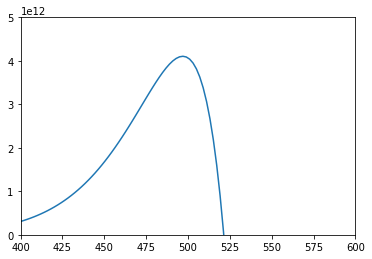

In [5]:
#********************************************************************

# This code is for our parameters

#********************************************************************

#Global Constants
kB = 1.38064852*10**(-23) # m^2 kg s^-2 K^-1 (boltzmann constant)
M  = 171*1.66054e-27 # mass of Yb in kg
sigma    = 1.5*10**(-19)        # cross sectional area of an atom

#Libraries
import matplotlib.pyplot as plt #plotting
import numpy as np
import matplotlib.pylab as pylab #plotting
import scipy.integrate as integrate #integrating
from numpy import sqrt, sin, cos, pi
from decimal import Decimal

#Set Parameters
lowT = 400
hghT= 600
steps = 100
T_oven = np.linspace(lowT,hghT,steps)
N = 5 #number of holes

T = T_oven + 273

#Dimensional Parameters (m)
L = 12.7 * 10**(-3)
r = .05*10**(-3)
A = pi*r**2

#Dimensional Parameters of DPT (m)
R_DPT         = 2.5*10**(-3)             # radius of DPT
L_DPT         = 518*10**(-3)             # length from the end of nozzle to the end of DPT   
area_DPT = pi*R_DPT**(2)
theta_DPT = np.arctan(R_DPT/L_DPT)

# Calculations
theta_mx = np.arctan(r/L) #maximum angle of an atom going through a tube
P = 10**(5.006 + 9.111 - 8111/T -1.0849*np.log10(T)) #pressure calculation
v_tilde = np.sqrt(kB*T/M)
n_0 = P/(kB*T)
MFP      = 1/(n_0*sigma)                                    # mean free path of the atoms
f = L/MFP
r_sld_angles = (theta_DPT)**2/(theta_mx)**2        # Area Ratio of theta_DPT and theta_DPT_fud
area_ratio       = area_DPT/(N*A)                           # Area Ratio

# pick from any of these three for flux
v_mp  = np.sqrt(2)*v_tilde
v_avg = np.sqrt(8/(np.pi))*v_tilde
v_rms = np.sqrt(3)*v_tilde

I = integrate.quad(lambda x: sin(x)*cos(x)/2, 0, theta_mx)
Flux1 = N*A*v_mp*n_0*I[0]*area_ratio*r_sld_angles 

Flux = Flux1*(1-f)

plt.ylim(ymin=0,ymax = .5*10**(13))
plt.xlim(xmin=lowT,xmax=hghT)
plt.plot(T_oven,Flux)